# INFO 103: Introduction to data science <br> Demo \# 7: Visualization <br> Author: JRW <br> Updated by: BYS


In [92]:
import json
import numpy as np
import re
import scipy.stats as mlab
import matplotlib.pyplot as plt
import datetime
from IPython.display import HTML
from IPython.display import IFrame,Image
%matplotlib inline

### Mission and setup
In this workbook we're going to explore data visualization, using Python. This includes both static and interactive visualization. These features are available through different Python packages: static visualizations are generally covered well through matplotlib:

`import matplotlib.pyplot as plt`

which should be available with through Anaconda's distribution that includes Jupyter. A nice interactive visualizations library lives in the Bokeh package, which will likely need to be downloaded from a command line through pip:

`pip install bokeh`

or anaconda:

`conda install bokeh`

#### Visualization in Python
Outside of notebooks, basic visualization in Python generally results in a separate graphics window opening up. Here's a really basic example of a Python histogram (generating some normal data) using pyplot that will work through any interactive python environment, notbooks or not.

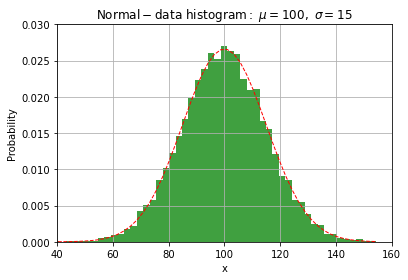

In [93]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Normal-data\ histogram:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


#### Do we really have to run `plt.show()` every time?
Recalling our introduction to Jupyter, there are 'magic' commands than can streamline plotting. In this case we can run the magic command `% matplotlib inline` to automatically ensure figures are shown.

In [94]:
%matplotlib inline

#### Figure dimensions
Let's try this out without `plt.show()`, and adjust the figure size to be a little bit larger.

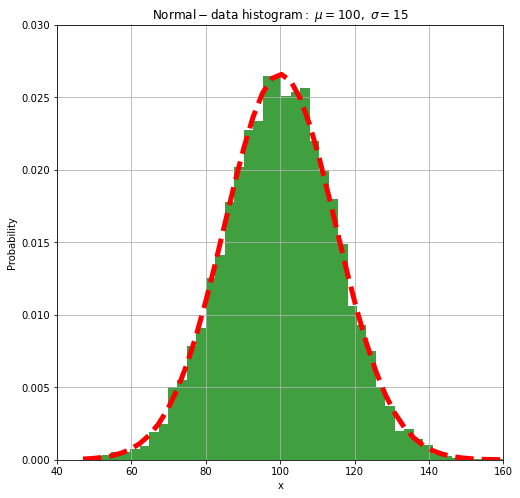

In [95]:
fig = plt.figure(figsize = (8,8))

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=5)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Normal-data\ histogram:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

#### Getting the details right
Now, even though all of the information is here in our figure, it's a little bit difficult to read the axes. Since visualization is all about communication, it's often better to push figure and axis titles and any other text towards the larger end. Since we have adjusted the figure dimensions to be larger, we now need to bring up the font sizes accordingly.

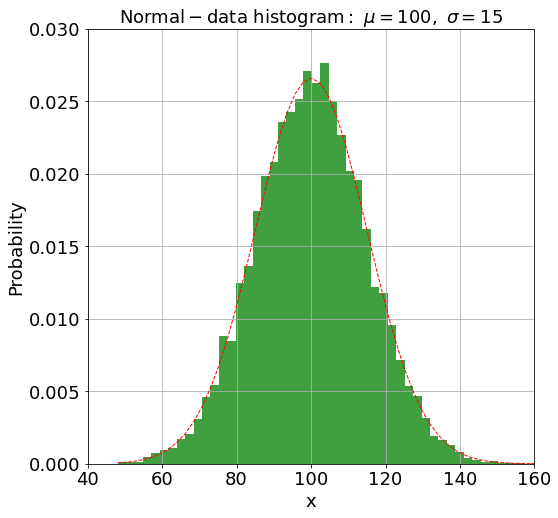

In [96]:
fig = plt.figure(figsize = (8,8))

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('x', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.title(r'$\mathrm{Normal-data\ histogram:}\ \mu=100,\ \sigma=15$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

#### What about a legend? 
Right now we are not communicating any information that differentiates the histogram from the 'true' distribution red-dashed line (which we'll also make a bit bigger, for clarity). Let's build in a legend!

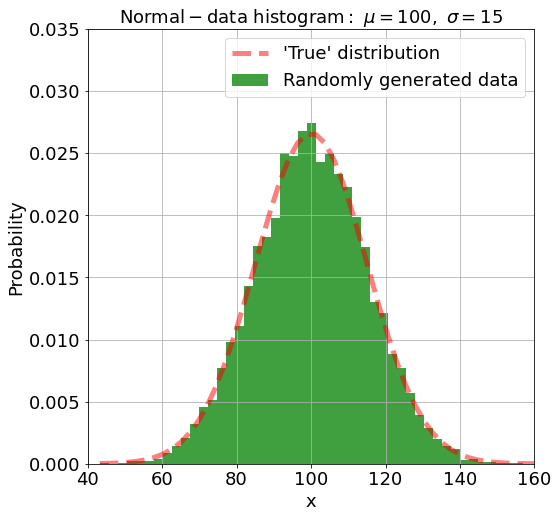

In [97]:
fig = plt.figure(figsize = (8,8))

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='green', alpha=0.75, label = "Randomly generated data")

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 5, label = "'True' distribution", alpha = 0.5)

plt.xlabel('x', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.title(r'$\mathrm{Normal-data\ histogram:}\ \mu=100,\ \sigma=15$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.axis([40, 160, 0, 0.035])
plt.grid(True)
plt.legend(fontsize = 18);

#### Can we keep it?
Unless the purpose of a visualization is just for EDA, and it not specifically a result to be communicated, it's generally best to make hard copipes of visualizations, e.g., a png, jpeg, pdf, etcetera. Let's take this figure and write it out to a file as a pdf. Note: since pdf is a vector graphics format, this will figure will technically have infinite resolution! 

PermissionError: [Errno 13] Permission denied: './myAwesomeHistogram.pdf'

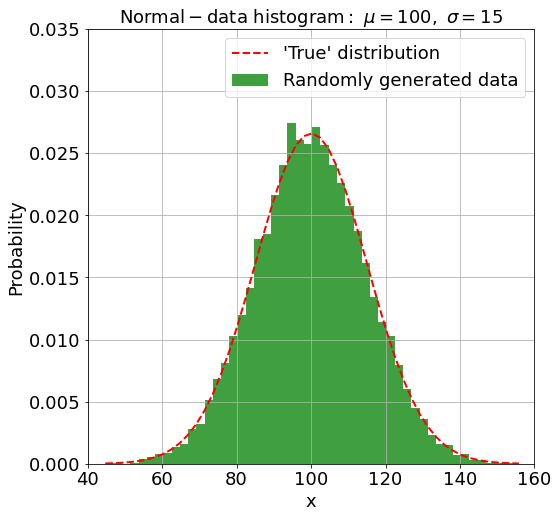

In [98]:
fig = plt.figure(figsize = (8,8))

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75, label = "Randomly generated data")

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 2, label = "'True' distribution")

plt.xlabel('x', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.title(r'$\mathrm{Normal-data\ histogram:}\ \mu=100,\ \sigma=15$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.axis([40, 160, 0, 0.035])
plt.grid(True)
plt.legend(fontsize = 18)

plt.savefig('./myAwesomeHistogram.pdf', bbox_inches='tight', pad_inches = .25)

#### Where's the pdf?
We saved the pdf in the same directory as this notebook. To bring this up, we can use a little bit of Python magic and run a command line:

In [99]:
!open myAwesomeHistogram.pdf

'open' is not recognized as an internal or external command,
operable program or batch file.


#### Other basic plot types
So, we've actually seen a few other visualization types in the other notebooks. We've used pyplot for scatter and density plots, and adding legends, adjusting their fonts, and saving to file, etc., work exactly the same for those. So, here's a few other basic examples (all using pyplot), including a box plot and a time series:

(0.5, 1.5, -110.0, 110.0)

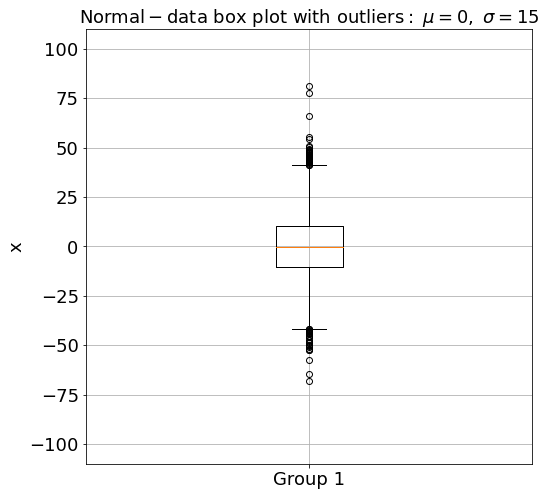

In [100]:
fig = plt.figure(figsize = (8,8))

# fake up some awesome boxplot data with outliers
mu, sigma = 0, 15
x = np.concatenate((
    mu + sigma*np.random.randn(10000),
    mu + sigma*np.random.rand(25) - 100*(np.random.rand(25) - np.random.rand(25))
))

plt.boxplot(x,showfliers=True)
plt.xticks([1], ['Group 1'])
plt.ylabel('x', fontsize = 18)
plt.title(r'$\mathrm{Normal-data\ box\ plot\ with\ outliers:}\ \mu=0,\ \sigma=15$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.grid(True)
plt.axis([0.5, 1.5, -110, 110])

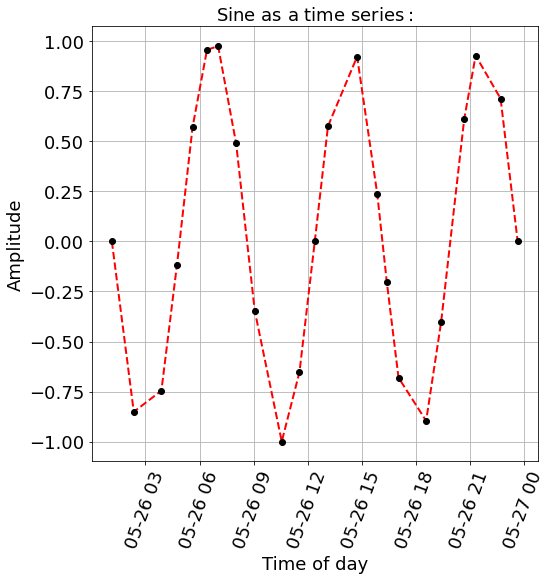

In [101]:
fig = plt.figure(figsize = (8,8))

## to make some timeseries data we'll have to use the datetime package!

minutes = np.random.randint(59, size = 24)

x = np.array([datetime.datetime(2017, 5, 26, i, minutes[i-1]) for i in range(1,24)])

t = np.array([(x[-1] - x[i]).seconds/float((x[-1] - x[0]).seconds) for i, _ in enumerate(x)])

y = np.sin(3*2*np.pi*t)

plt.plot(x,y,color = "red", linestyle = 'dashed', linewidth = 2)
plt.plot_date(x,y, color = 'black')
plt.xticks(rotation=70)

plt.ylabel('Amplitude', fontsize = 18)
plt.xlabel('Time of day', fontsize = 18)
plt.title(r'$\mathrm{Sine\ as\ a\ time\ series:}$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.grid(True)

#### These different plots all have their nuances
For example, we may want to display multiple box plots side-by-side!

(0.5, 3.5, -135.0, 135.0)

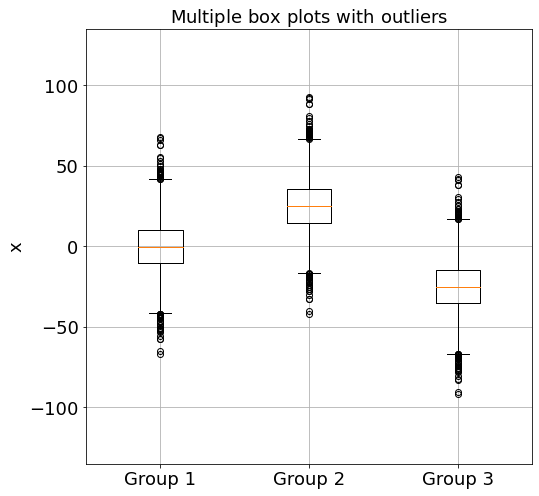

In [102]:
fig = plt.figure(figsize = (8,8))

# fake up some awesome boxplot data with outliers
mu, sigma = 0, 15
x = np.concatenate((
    mu + sigma*np.random.randn(10000),
    mu + sigma*np.random.rand(25) - 100*(np.random.rand(25) - np.random.rand(25))
))

data = [x, np.array(x) + 25, np.array(x) - 25]

plt.boxplot(data)
plt.xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])
plt.ylabel('x', fontsize = 18)
plt.title(r'$\mathrm{Multiple\ box\ plots\ with\ outliers}$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.grid(True)
plt.axis([0.5, 3.5, -135, 135])


#### Putting things together
Sometimes it's nice to make a figure that has multiple plot all next to one another, It may help to get things into a report snugly, or it may be that twi figures share an axis and are best placed side-by-side (like our multiple box plots) for comparision. Let's put all three next to one another.

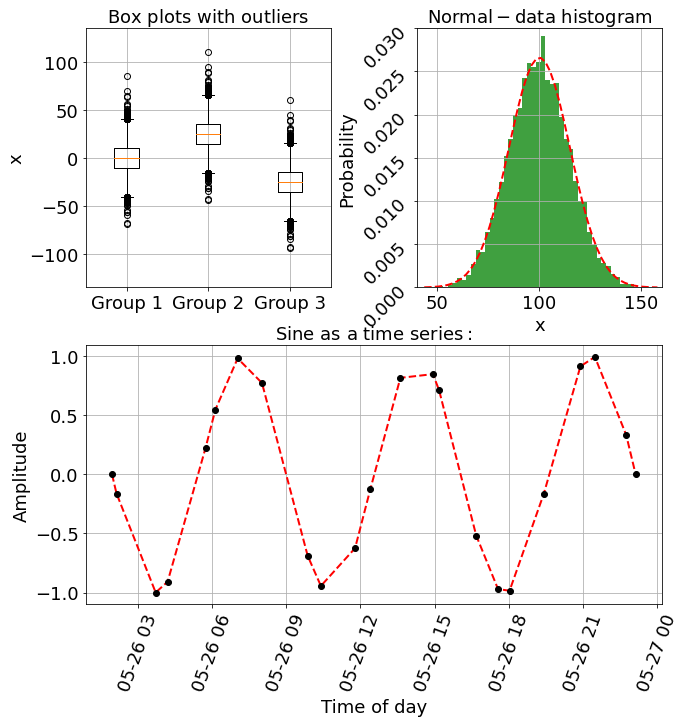

In [103]:
fig = plt.figure(figsize = (8,8))

# position the first figure
first_ax = fig.add_axes([0, 0, 1, 0.45])

## to make some timeseries data we'll have to use the datetime package!

minutes = np.random.randint(59, size = 24)

x = np.array([datetime.datetime(2017, 5, 26, i, minutes[i-1]) for i in range(1,24)])
y = np.random.randint(100, size=x.shape)

t = np.array([(x[-1] - x[i]).seconds/float((x[-1] - x[0]).seconds) for i, _ in enumerate(x)])

y = np.sin(3*2*np.pi*t)

plt.plot(x,y,color = "red", linestyle = 'dashed', linewidth = 2)
plt.plot_date(x,y, color = 'black')
plt.xticks(rotation=70)

plt.ylabel('Amplitude', fontsize = 18)
plt.xlabel('Time of day', fontsize = 18)
plt.title(r'$\mathrm{Sine\ as\ a\ time\ series:}$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.grid(True)

# position the second figure
second_ax = fig.add_axes([0, 0.55, 0.425, 0.45])

# fake up some awesome boxplot data with outliers
mu, sigma = 0, 15
x = np.concatenate((
    mu + sigma*np.random.randn(10000),
    mu + sigma*np.random.rand(25) - 100*(np.random.rand(25) - np.random.rand(25))
))

data = [x, np.array(x) + 25, np.array(x) - 25]

plt.boxplot(data)
plt.xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])
plt.ylabel('x', fontsize = 18)
plt.title(r'$\mathrm{Box\ plots\ with\ outliers}$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.grid(True)
plt.axis([0.5, 3.5, -135, 135])

# position the third figure
third_ax = fig.add_axes([0.575, 0.55, 0.425, 0.45])

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75, label = "Randomly generated data")

# add a 'best fit' line
y = mlab.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 2, label = "'True' distribution")

plt.xlabel('x', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.title(r'$\mathrm{Normal-data\ histogram}$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.axis([40, 160, 0, 0.03])
plt.yticks(rotation=45)
plt.grid(True)

### Let's have some fun with FIFA and Spotify data
Here, we're going to do some basic EDA using seaborn visualizations. Ref: kaggle.com

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
# Path of the file to read
fifa_filepath =  "./fifa.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)

In [106]:
# Print the first 5 rows of the data
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


In [107]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

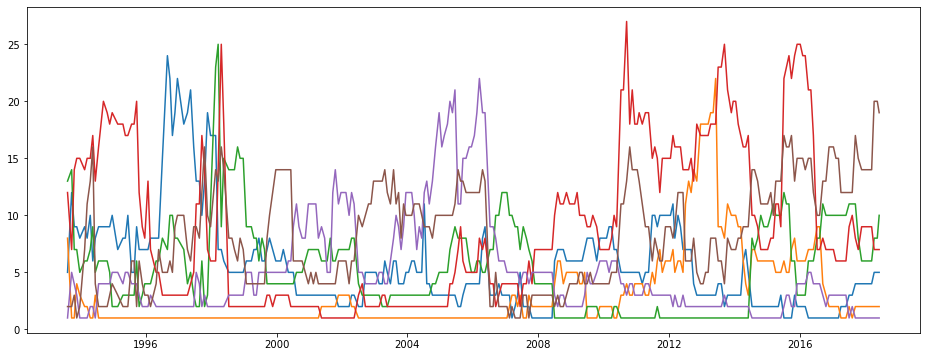

In [108]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
#sns.lineplot(data=fifa_data);

plt.plot(fifa_data)
plt.show()

## Spotify data
The dataset for this tutorial tracks global daily streams on the music streaming service Spotify. We focus on five popular songs from 2017 and 2018: <br>

"Shape of You", by Ed Sheeran <br>
"Despacito", by Luis Fonzi <br>
"Something Just Like This", by The Chainsmokers and Coldplay <br>
"HUMBLE.", by Kendrick Lamar <br>
"Unforgettable", by French Montana <br>

In [109]:
# Path of the file to read
spotify_filepath = "./spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

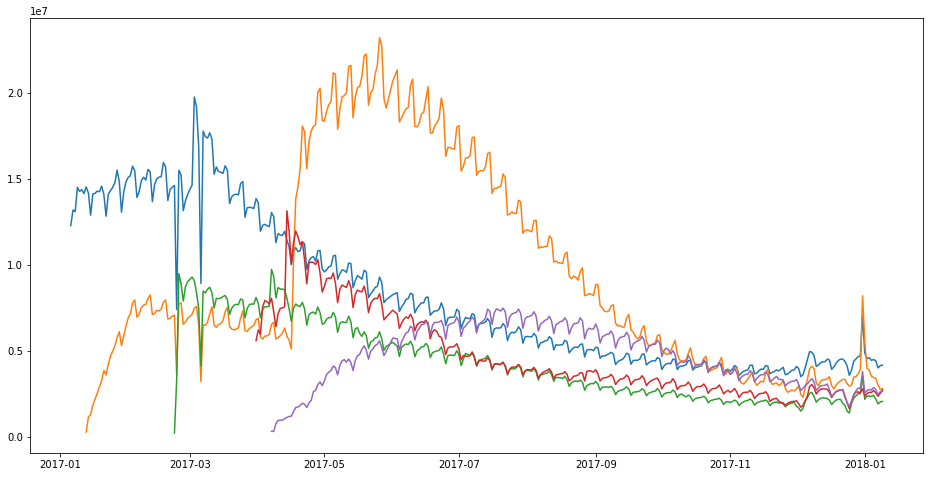

In [110]:
# Line chart showing daily global streams of each song 
#sns.lineplot(data=spotify_data);

fig = plt.figure(figsize = (16,8))

plt.plot(spotify_data)
plt.show()

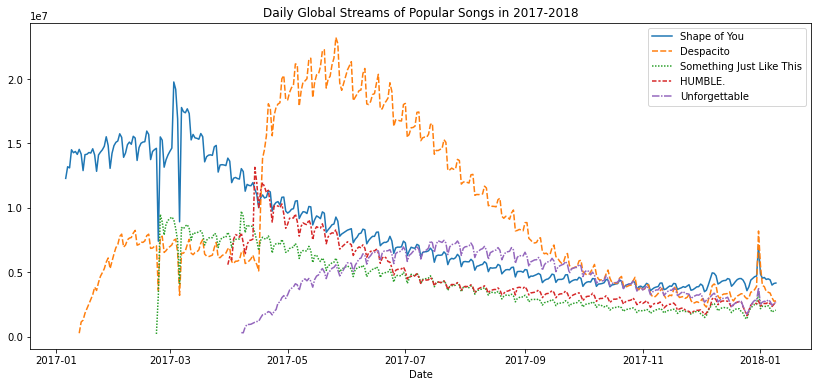

In [111]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)
plt.show()

In [112]:
list(spotify_data.columns)

['Shape of You',
 'Despacito',
 'Something Just Like This',
 'HUMBLE.',
 'Unforgettable']

Text(0.5, 0, 'Date')

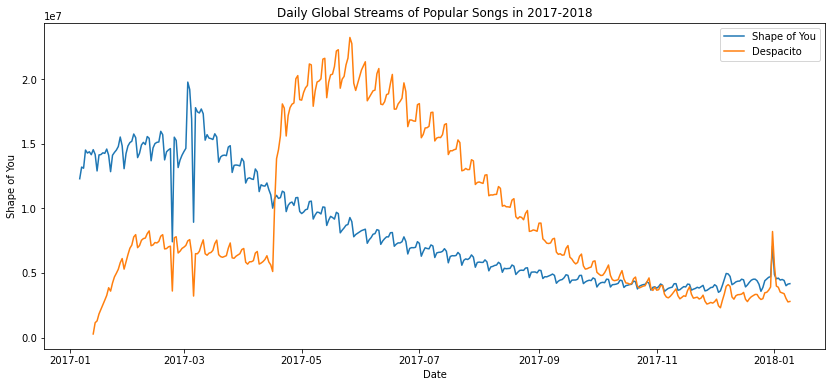

In [113]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")

### Interactivity
Here, we're going to take a quick look a bokeh's interactive capabilities. To get things started we have to do some package imports:

In [114]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook

#### Some notes
We'll start with a static visualization, but since the goal with bokeh is interactivity, it natively renders as html. Thus, when we use bokeh's `show()` functon, it will always display in a browser window, whether or not we choose to embed it in our notebook. Here's a fixed, normal histogram that will open up a separate browser window!

In [115]:
params = [0, 0.5]

p = figure(tools="save",background_fill_color="#E8DDCB")

p.title.text="Normal Distribution (μ="+str(params[0])+", σ="+str(params[1])+")"

measured = np.random.normal(params[0], params[1], 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(params[1] * np.sqrt(2*np.pi)) * np.exp(-(x-params[0])**2 / (2*params[1]**2))

pdf = mlab.norm.pdf(edges, params[0],params[1])

h = p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
l = p.line(edges, pdf, line_color="#D95B43", line_width=3, alpha=0.7, legend="PDF")

p.legend.location = "top_left"
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
t = show(
    gridplot([p], ncols=1, plot_width=600, plot_height=600, toolbar_location=None), 
    notebook_handle = True
)

#### Embedding in a notebook
Much like there is a magic command to have matplotlib automatically have figures embed in a notebook, we can run `output_notebook()` to have bokeh embed right here:

In [78]:
output_notebook()

Loading BokehJS ...

In [116]:
params = [0, 0.5]

p = figure(tools="save",background_fill_color="#E8DDCB")

p.title.text="Normal Distribution (μ="+str(params[0])+", σ="+str(params[1])+")"

measured = np.random.normal(params[0], params[1], 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(params[1] * np.sqrt(2*np.pi)) * np.exp(-(x-params[0])**2 / (2*params[1]**2))

pdf = mlab.norm.pdf(edges, params[0],params[1])

h = p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
l = p.line(edges, pdf, line_color="#D95B43", line_width=3, alpha=0.7, legend="PDF")

p.x_range.start = -5
p.x_range.end = 5

p.y_range.start = 0
p.y_range.end = 1

p.legend.location = "top_left"
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
t = show(gridplot([p], ncols=1, plot_width=600, plot_height=600, toolbar_location=None), notebook_handle = True)

#### Updating bokeh figures
The goal being interactivity, bokeh figures can be updated. This can be done in our notebook with the `push_notebook()` function. Let's modify the shape of our data and distribution with $\mu$ and $\sigma$!

In [117]:
params[0] = 1.25
params[1] = 0.5

measured = np.random.normal(params[0], params[1], 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(min(measured), max(measured), 1000)
pdf = mlab.norm.pdf(edges, params[0],params[1])

l.data_source.data['x'] = edges
l.data_source.data['y'] = pdf
h.data_source.data['top'] = hist
h.data_source.data['left'] = edges[:-1] 
h.data_source.data['right'] = edges[1:]

p.title.text="Normal Distribution (μ="+str(params[0])+", σ="+str(params[1])+")"

push_notebook(handle = t)

#### Making things interactive
Now that we can update our figure, we have to package the update into a function. Then, whenever we execute the function, the figure will update:

In [118]:
def histUpdate(mu, sigma):
    params[0] = mu
    params[1] = sigma

    measured = np.random.normal(params[0], params[1], 1000)
    hist, edges = np.histogram(measured, density=True, bins=50)

    x = np.linspace(min(measured), max(measured), 1000)
    pdf = mlab.norm.pdf(edges, params[0],params[1])

    l.data_source.data['x'] = edges
    l.data_source.data['y'] = pdf
    h.data_source.data['top'] = hist
    h.data_source.data['left'] = edges[:-1] 
    h.data_source.data['right'] = edges[1:]

    p.title.text="Normal Distribution (μ="+str(params[0])+", σ="+str(params[1])+")"

    push_notebook(handle = t)

Now, let's re-show our figure right here and test out the function:

In [119]:
t = show(gridplot([p], ncols=1, plot_width=600, plot_height=600, toolbar_location=None), notebook_handle = True)

In [120]:
histUpdate(0, 1)

#### Wrapping our function in a GUI
Now that we have our function, we can use sliders to adjust the mean and standard deviation of our histogram. The widget we'll use comes from ipython:

In [121]:
from ipywidgets import interact

Now, we just need to launch the ipython widget:

In [122]:
interact(histUpdate, mu = (-4,4), sigma = (0.05,5))

interactive(children=(IntSlider(value=0, description='mu', max=4, min=-4), FloatSlider(value=2.525, descriptio…

<function __main__.histUpdate(mu, sigma)>

In [123]:
t = show(gridplot([p], ncols=1, plot_width=400, plot_height=400, toolbar_location=None), notebook_handle = True)

#### Where to go from here?
For simplicity, we used an iPython widget, which is kind of cheating, since a big goal of Bokeh is to launch interactive web apps as general webpages. These won't have any iPython/Jupyter capability, so widgets like sliders or rollovers or textboxes or have to be built more directly as browser apps. Since browsers can't run Python code, Bokeh is really only every wrapping javascript! This means that custom Bokeh graphics requires dealing with a little more javasript. However, Bokeh does provide some basic widgets which can be used through writing Python, only, though they are still a little more complicated than that presented above. For more information, check out
* http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/widgets.html